In [182]:
import pandas as pd
import os
from sqlalchemy import create_engine, func
import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from flask import Flask, jsonify

In [183]:
# Create engine using the `demographics.sqlite` database file
engine = create_engine("sqlite:///hawaii.sqlite")
# engine = create_engine(f'{dialect}://{user}:{password}@{host}:{port}/{database}')

In [184]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [185]:
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [186]:
print(Base.classes.keys())

['measurement', 'station']


In [187]:
station = Base.classes.station

In [188]:
session = Session(engine)

In [189]:
list(station.__table__.columns)

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('name', VARCHAR(length=255), table=<station>, nullable=False),
 Column('station', VARCHAR(length=255), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [190]:
# Assign the stations class to a variable called `Station`
Station = Base.classes.station
print(list(Station.__table__.columns))

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('name', VARCHAR(length=255), table=<station>, nullable=False), Column('station', VARCHAR(length=255), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>)]


In [191]:
Measurement = Base.classes.measurement
print(list(Measurement.__table__.columns))

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', VARCHAR(length=255), table=<measurement>), Column('date', VARCHAR(length=255), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>)]


In [192]:
# Create a session
session = Session(engine)

In [193]:
# Precipitation Analysis
prcp_df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date > '2017-01-01'", engine, index_col='date')

prcp_data_df.head()

,prcp
date,
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0
2017-01-06,0.0


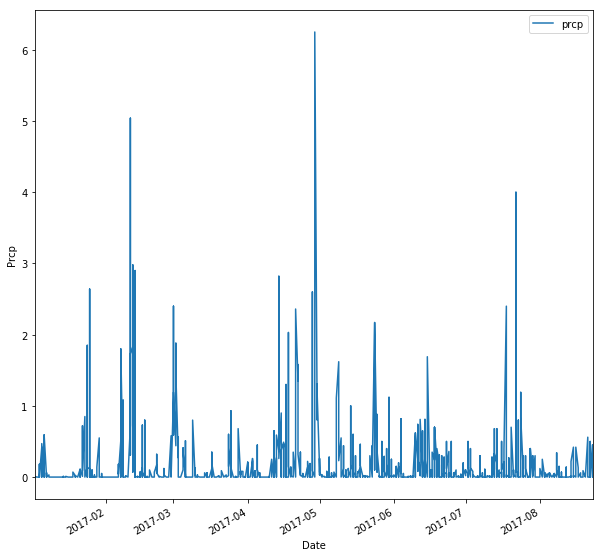

In [194]:
prcp_data_df.plot(figsize=(10, 10))

plt.xlabel('Date')
plt.ylabel('Prcp')

plt.show()

In [195]:
prcp_data_df.describe(percentiles=None, include=None, exclude=None)

,prcp
count,5564.000000
mean,0.150884
std,0.435667
min,0.000000
25%,0.000000
50%,0.000000
75%,0.090000
max,6.250000


In [196]:
#Station Analysis
total_station_df = pd.read_sql("SELECT Distinct Count(name) FROM station", engine)

total_station_df.head(100)

,Count(name)
0,27


In [197]:
stat_obv_count_df = pd.read_sql("select station, Count(date) FROM measurement GROUP BY station Order by count(date) desc", engine)
 
stat_obv_count_df

,station,Count(date)
0,USC00519281,11088
1,USC00519397,10896
2,USC00513117,10836
3,USC00519523,10676
4,USC00516128,10448
5,USC00514830,8808
6,USC00511918,7916
7,USC00517948,5488
8,USC00518838,2044


In [198]:
print('Station USC00519281 has the highest amount of stations')

Station USC00519281 has the highest amount of stations


In [199]:
tobs = pd.read_sql("SELECT * FROM measurement WHERE date > '2017-01-01'", engine, index_col='date')

tobs.head()

,id,station,prcp,tobs
date,,,,
2017-01-02,2496,USC00519397,0.0,66.0
2017-01-03,2497,USC00519397,0.0,63.0
2017-01-04,2498,USC00519397,0.0,62.0
2017-01-05,2499,USC00519397,0.0,63.0
2017-01-06,2500,USC00519397,0.0,64.0


In [200]:
freq = pd.read_sql("SELECT count(id), station FROM measurement WHERE date > '2017-01-01' group by station order by count(id) desc", engine)

freq.head(1000)

,count(id),station
0,916,USC00519397
1,884,USC00516128
2,880,USC00519281
3,844,USC00513117
4,836,USC00519523
5,776,USC00514830
6,428,USC00517948


In [201]:
plt.figure(figsize=(20, 20))
plt.hist(tobs, bins=12)


# add title and axis labels
plt.title('Temperatures for Previous Year', fontsize=20)
plt.xlabel('Temp')
plt.ylabel('Frequency')

plt.show()

In [217]:
#Temp Analysis

def calc_temps(start_date, end_date):
    start = datetime.strptime(start_date, '%Y-%m-%d').date()
    end = datetime.strptime(end_date, '%Y-%m-%d').date()
    
    min_temp = (session
                .query(func.min(Measurement.tobs))
                .filter(Measurement.date >= start)
                .filter(Measurement.date <= end)
                )
    
    print(min_temp)
    
    max_temp = (session
                .query(func.max(Measurement.tobs))
                .filter(Measurement.date >= start)
                .filter(Measurement.date <= end)
                )
    
    print(max_temp)
    
    avg_temp = (session
                .query(func.avg(Measurement.tobs))
                .filter(Measurement.date >= start)
                .filter(Measurement.date <= end)
                )
    
    print(avg_temp)
    
    return {'min': min_temp, 'max': max_temp, 'avg': avg_temp}

In [218]:
trip_start = '2017-01-01' 
trip_end = '2017-01-23'

In [219]:
trip_temp = calc_temps(trip_start, trip_end)

SELECT min(measurement.tobs) AS min_1 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ?
SELECT max(measurement.tobs) AS max_1 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ?
SELECT avg(measurement.tobs) AS avg_1 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ?


In [223]:
trip_temp.figure(figsize=(10, 10))
plt.bar(min_temp, max_temp, align='center', alpha=0.5)

plt.show()

AttributeError: 'dict' object has no attribute 'figure'